# CS 237 Spring 2020  Homework Five

### Due date: PDF file due Thursday March 5th @ midnight in GradeScope with 6-hour grace period

### Late deadline:  If submitted up to 24 hours late, you will receive a 10% penalty (with same 6 hours grace period)

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

There are two sections to the homework: problems 1 - 8 are analytical problems about last
week's material, and the remaining problems are coding problems which will be discussed in lab next week. 


In [1]:
# Here are some imports which will be used in code that we write for CS 237
 

# Imports potentially used for this lab


import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi,log,floor       # import whatever you want from math
from random import seed, random
from scipy.special import comb
from collections import Counter

%matplotlib inline

           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# This draws a useful bar chart for the distribution of the list of integers in outcomes

def draw_distribution_from_outcomes(outcomes, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = np.size(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )    # 
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#draw_distribution_from_outcomes([1,4,3,5,4,6,2,4,3,5,4])

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution_of_random_variable(Rx, Px, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,Px,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
#draw_distribution_of_random_variable([1,2,3,4], [0.25,0.35,0.15,0.25])

p = 0.14159234368

#                                                                                   ||||||||||||||||
# Notice how we gave strings as labels for the outcomes:                            vvvvvvvvvvvvvvvv

#draw_distribution_of_random_variable( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))
 


## Analytical Problem Instructions

The first few problems ask you to "describe" a random variable, which means:

> (i)   Give $R_X$ (you may schematize it if it is very complicated or infinite);<br>
> (ii)  List out the values of $P_X$ corresponding to each element of $R_X$; <br>
> (iii)  Draw the PMF, using the function <code>draw_distribution_of_random_variable</code> provided in the previous cell. <br>


A nice way to approach these is to do any complicated calculations in Python and then if you have
to change something you won't have to redo all the calculations. Plus, you will make fewer
mistakes in calculation. However, there is no need to do this for simpler problems. 

I also **strongly** recommend creating new variables for each problem, for example Rx1, Rx2, etc. for
the range of the random variable in problems 1, 2, etc.   That way, you won't have problems if you
forget and use the wrong variable! You can also refer to previous results without problems. 

Following Problem One is an example of what I mean (it is a simple problem, but I am showing you
how you could approach it). 

You are not **required** to do it this way, but I *encourage* you to do something similar. 

## Example Problem


*Describe* the random variable X = "the number of heads showing on 2 flipped fair coins"


Solution:

(i)   Rx = [0, 1, 2]
(ii)  Px = [0.25 0.5  0.25]
(iii)


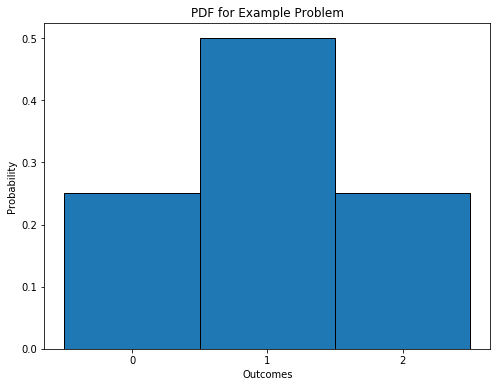

In [2]:
Rx0 = [0,1,2]
    
Px0 = [ C(2,k)*0.5*0.5 for k in Rx0 ]

print("Solution:\n")
print("(i)   Rx =",Rx0)
print("(ii)  Px =",np.around(Px0,4))             # in case you get complicated decimals, round to 4 places
print("(iii)")

draw_distribution_of_random_variable( Rx0, Px0, title='PDF for Example Problem')

## Problem One

All the random variables we studied in lecture were "with replacement"; however, random variables can
implement any random experiment, including those involving choices "without replacement," as we explore here. 

You are not responsible for the Hypergeometric distribution per se, but we
will explore the random experiment which forms the basis for the distribution. 
This problem is a specific example of the Hypergeometric (and you should look at
the formula for $P_X$ given in the textbook to do the problem -- it is very similar to the Poker probabilities!). 

You have a bag that contains 4 blue marbles and 6 red marbles. You choose 7 marbles at random (without replacement). 

Let $X$ = "The number of blue marbles in your selection"

*Describe* the random variable $X$. 


Solution:

(i)   Rx = [1, 2, 3, 4]
(ii)  Px = [0.0333 0.3    0.5    0.1667]
(iii)


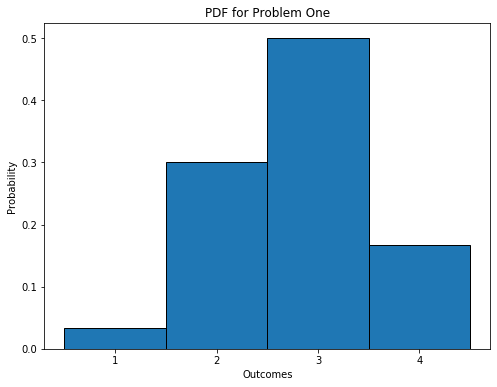

In [3]:

# In the textbook, the formula is given by C(b,x)*C(r,k-x)/C(b+r,k) when x is the number of blue marbles selected,
# b is the total number of blue marbles, r is the total number of red marbles, 
# and k is the number of marbles we are choosing.
Rx1 = [1,2,3,4]
#Px1 = [C(4,1)*C(6,6)/C(10,7), C(4,2)*C(6,5)/C(10,7), C(4,3)*C(6,4)/C(10,7), C(4,4)*C(6,3)/C(10,7)]
#Px1 = [0.0333               , 0.3                  , 0.5                  , 0.1667]
Px1 = [C(4,x)*C(6,6-x+1)/C(10,7) for x in Rx1]

print("Solution:\n")
print("(i)   Rx =",Rx1)
print("(ii)  Px =",np.around(Px1,4))             # in case you get complicated decimals, round to 4 places
print("(iii)")
draw_distribution_of_random_variable( Rx1, Px1, title='PDF for Problem One')


## Problem Two

We will again explore a random variable (which has no name, I just made it up) which involves selection without replacement. 

Suppose you deal a 5-card hand from a standard deck which has been shuffled well. 

Let $X$ = "The number of Spades occurring in the hand." 

*Describe* the random variable $X$. 

Solution:

(i)   Rx = [0, 1, 2, 3, 4, 5]
(ii)  Px = [0.2215 0.4114 0.2743 0.0815 0.0107 0.0005]
(iii)


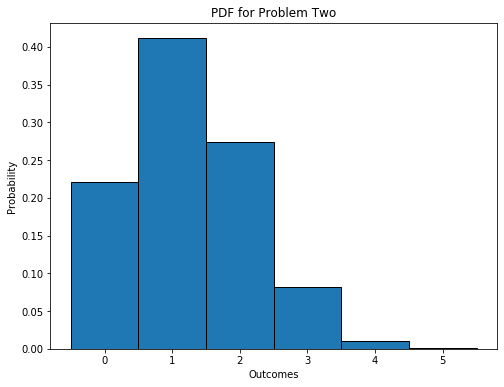

In [4]:
Rx2 = [0,1,2,3,4,5]
#Px2 = [C(13,0)*C(39,5)/C(52,5), C(13,1)*C(39,4)/C(52,5), C(13,2)*C(39,3)/C(52,5), C(13,3)*C(39,2)/C(52,5), C(13,4)*C(39,1)/C(52,5), C(13,5)*C(39,0)/C(52,5)]
Px2 = [C(13,x)*C(39,5-x)/C(52,5) for x in Rx2]

print("Solution:\n")
print("(i)   Rx =",Rx2)
print("(ii)  Px =",np.around(Px2,4))             # in case you get complicated decimals, round to 4 places
print("(iii)")
draw_distribution_of_random_variable( Rx2, Px2, title='PDF for Problem Two')


## Problem Three

We refer to the random variable $X$ from Problem Two. 

<i>Describe</i> the random variable $Y = 2X + X - 1$


Hint: when more than one instance of a random variable is involved, it is often useful to draw a matrix of all possibilities.  Consider the two instances
of $X$ (i.e., two "pokes" at the same random variable)and draw a matrix of each of the possible outputs of the random variables, one along the rows and one along the columns.

|    |  0  |  1  |  2  |  3  |  4  |  5  |  5  | 
|----|-----|-----|-----|-----|-----|-----|-----|
|  <b>0</b> |    |     |    |     |     |     |     |  
|  <b>1</b> |    |     |    |     |     |     |     |  
|  <b>2</b> |    |     |    |     |     |     |      | 
|  <b>3</b> |    |     |    |     |     |     |     |  
|  <b>4</b> |    |     |    |     |     |     |     | 
|  <b>5</b> |    |     |    |     |     |     |     |      

For each slot in the resulting matrix, you can figure out the probabilities
by multiplication (since the two instances of X are independent), as shown in class. The value in each slot will be $2X + X - 1$. 
Some outcomes will be the same, and you will have to add the probabilities
to get the PMF of Y. 

I would do this calculation in Python, but it is up to you. 
If you use Python, you might want to use a dictionary to keep track of the values in the PMF. 


Solution:

(i)   Ry = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
(ii)  Py = [4.907710e-02 9.114330e-02 1.519054e-01 1.873305e-01 1.759831e-01
 1.465020e-01 9.770800e-02 5.611740e-02 2.768520e-02 1.119930e-02
 3.927400e-03 1.119000e-03 2.509000e-04 4.570000e-05 5.300000e-06
 2.000000e-07]
(iii)


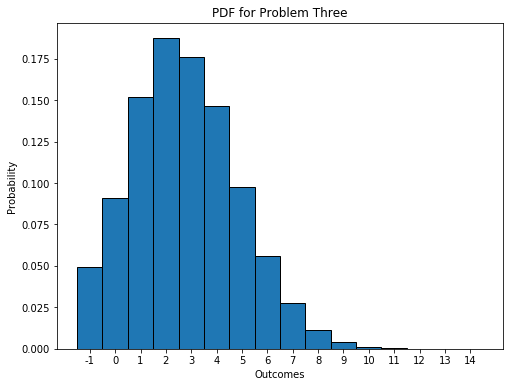

In [5]:
my_dict = {}
for i in range(6):
    for j in range(6):
        y = 2*i+j-1
        prob_x1 = C(13,i)*C(39,5-i)/C(52,5)
        prob_x2 = C(13,j)*C(39,5-j)/C(52,5)
        if (y in my_dict.keys()):
            my_dict.update({y: my_dict.get(y)+ prob_x1*prob_x2})
        else:
            my_dict.update({y: prob_x1*prob_x2})
Ry3 = list(my_dict.keys())
Py3 = list(my_dict.values())

print("Solution:\n")
print("(i)   Ry =",Ry3)
print("(ii)  Py =",np.around(Py3,7))             # in case you get complicated decimals, round to 4 places
print("(iii)")
draw_distribution_of_random_variable( Ry3, Py3, title='PDF for Problem Three')
#sum = 0
#for k in range(-1,15):
#    sum += my_dict[k]
#print(sum)                checking to see if they add up to value 1.0                     


## Problem 4 (Independence of RVs)

Part (A)  Let  $X$ = "the number of dots showing on a single thrown die" and let

$$Y\,=\,X_1 + X_2.$$

(The subscripts here do not indicate different random variables, but two
different instance ("pokes" as I say in lecture) of the *same* random variable.
This is a fairly common notation.)

(A) Show that the random variables $Y$ and $X_1$ are *not independent*. 

(B) In order to encode "events" from the first part of the course, we will use
the technique of "indicator random variables" from the textbook. 

$$\begin{equation}
        I_A(x) = \begin{cases}
                   1               & \text{ if $X_1$ returns an even number } \\
                   0              & \text{otherwise}
               \end{cases}
\end{equation}$$

and finally let

$$\begin{equation}
        I_B(x) = \begin{cases}
                   1               & \text{ if } X_1 < X_2 \\
                   0              & \text{otherwise}
               \end{cases}
\end{equation}$$

Are the random variables $I_A$ and $I_B$ independent?  Show all your work (it
should be very familiar to you, once you think about the notation), including
the matrix (which should be very small!). 

(C)  Suppose you have two independent binomial random variables as follows:

$$Z_1 = Binomial(N_1,p)\quad\quad Z_2 = Binomial(N_2, p)$$

Note that $N_1$ and $N_2$ are possibly different, but the $p$ is the same
in both cases. 

What is the distribution of the random variable $Z_3\,=\,Z_1 + Z_2$?

You must give the answer and your justification for full credit. 

## SOLUTION
<p>(A) Let's assume that X1 = 2 and Y = 5. For Y to be 5, since X1 = 2, X2 has to be 3.</p>
<p>P(X1 = 2) = 1/6</p>
<p>P(X2 = 3) = 1/6</p>
<p>P(Y = 5) = 4/36 = 1/9</p>
<p>P(Y = 5, X1 = 2) = 1/36</p>
<p>In order for Y and X1 to be independent, P(Y=5,X1=2) = P(X1=2)*P(Y=5). However, as we can see from the above, P(Y = 5, X1 = 2) = 1/36 and P(X1=2)*P(Y=5) = 1/45, which are not equivalent. Therefore, Y and X1 are not independent.</p>
<p>(B)</p>


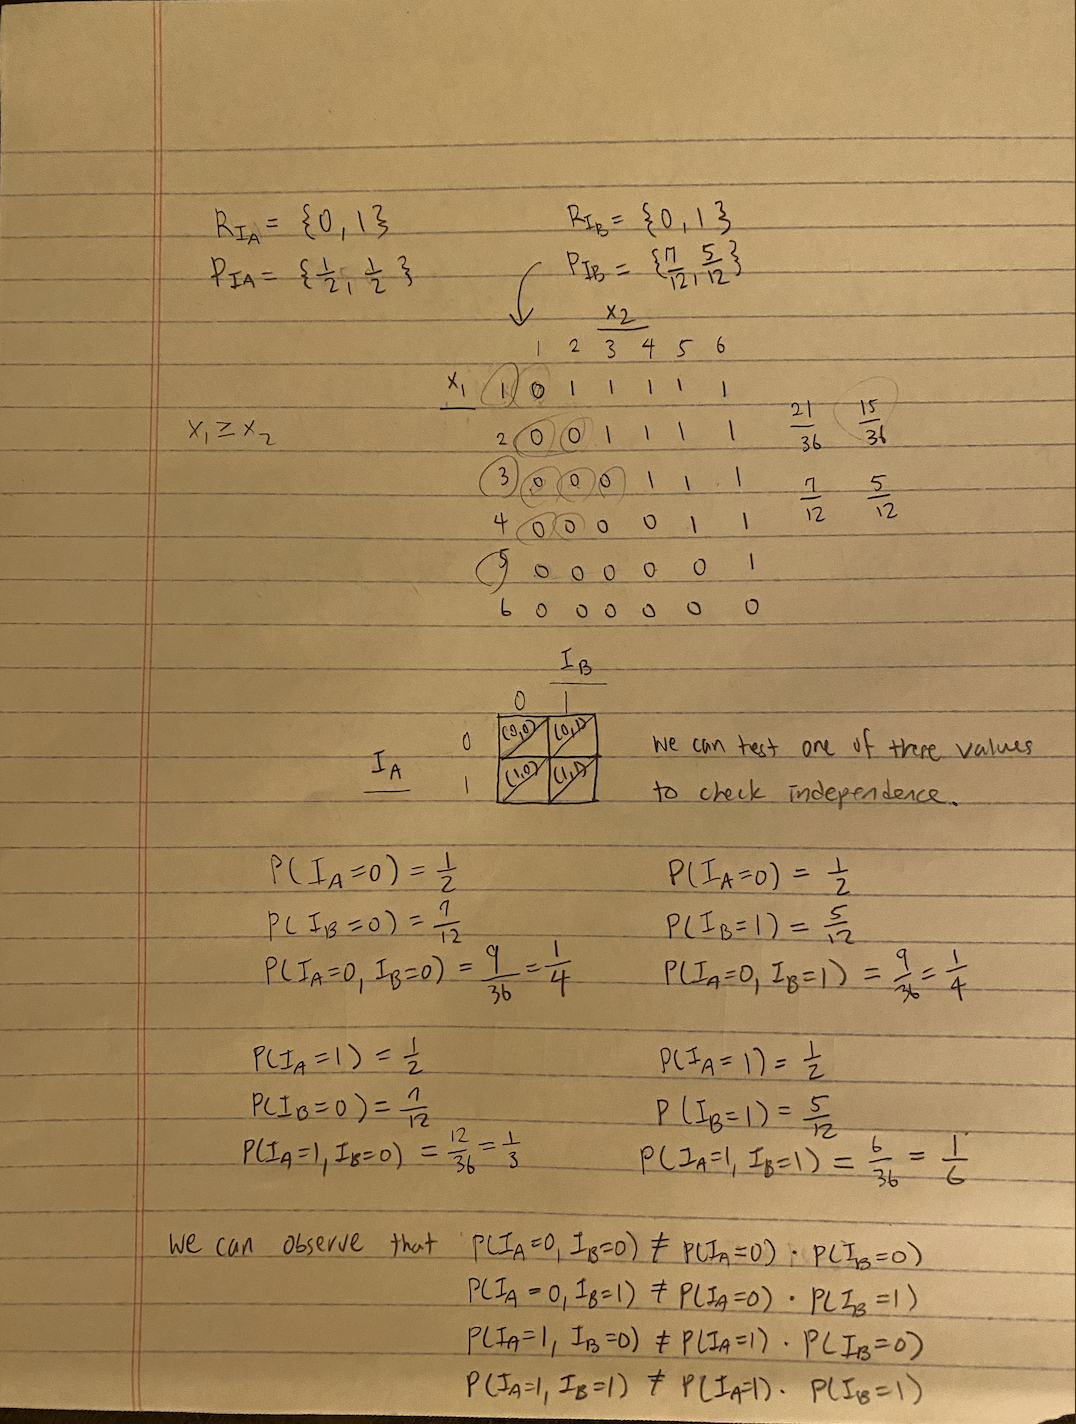

<p>(C) To make the explanation more clear, let Z1 = X and let Z2 = Y.</p>
<p>Since Z1 = X = Binomial(N1,p),</p>
<p>X = X1 + X2 + X3 + ... + XN1; where Xi's are independent Bernoulli(p) random variables. Similarly,</p>
<p>Since Z2 = Y = Binomial(N2,p),</p>
<p>Y = Y1 + Y2 + Y3 + ... + YN2; where Yi's are independent Bernoulli(p) random variables.</p>
<p>Therefore, since Z = X + Y</p>
<p>Z = X1 + X2 + ... + XN1 + Y1 + Y2 + ... + YN2; where Xi's and Yi's are independent Bernoulli(p) random variables.</p>
<p>Hence, by using the Lemma 3.1, we can conclude that Z is a binomial random variable: Z ~ Binomial(N1+N2, p)</p>
<p>Therefore,</p>
<p>RZ = {0,1,2,...,N1+N2}, for k in RZ,</p>
<p>PZ(k) = C(N1+N2,k)*p^k*(1-p)^(m+n-k)</p>


## Problem 5 (Binomial)


(A) If you roll a die 5 times, what is the probability of 5 or 6 showing on the die in exactly 2 of the rolls?

(B) If two fair dice are rolled 10 times, what is the probability of at least one 6 (on either die) in exactly five of these 10 rolls?

(C) Suppose that each day the price of a stock moves up 1/8th of a point with probability 1/3 and moves down 1/8th of the point with probability 2/3. If the price fluctuations from day to day are independent and identically distributed, what is the probability that after 6 days the stock has its original price?

Hint for (C): you could draw a tree, but it is easier to answer the following question: how many moves up and how many moves down result in no change in the stock price after 3 days?
 

## SOLUTION
<p>(A)</p> 
<p>C(5,2)*(2/6)^(2)*(1-2/6)^(5-2) = 0.3292</p>
<p>(B)</p>
<p>C(10,5)*(11/36)^5*(25/36)^5 = 0.1084</p>
<p>(C)</p>
<p>C(6,3)*(1/3)^3*(2/3)^3 = 0.2195</p>

## Problem 6


Suppose numbers in the range $[0..1)$ are randomly and independently selected
and rounded to 3 decimal places. Therefore we can assume that all possible combinations of 3 digits after the decimal point are equally likely. 

For each of these, give the discrete distribution involved, phrase it as a probability in the form `P(...X....)` and answer the question. 

(a) What is the probability that the first selection is no more than 0.345?

(b) What is the probability that 0.345 occurs at least twice in the first 1000 selections?

(c) What is the probability that 0.345 is selected for the first time on the 1000th selection?

Hint: This uses 3 of the 4 discrete distributions we studied last Thursday (2/20).  

<p>(a)</p>
<p>Using the concept of bernoulli, the probability of having the first selection that is no more than 0.345 is in the range of [0.000, 0.345] inclusive. Therefore, 0.346</p>
<p>(b)</p>
<p>Using the concept of binomial and inverse method, we have to subtract the probability of having 0 or 1 out of the total probability. That is: 1 - P(X=0) - P(X=1) = 1 - C(1000,0)(0.001)^0(0.999)^1000 - C(1000,1)(0.001)^1(0.999)^999 = 0.2642</p>
<p>(c)</p>
<p>Using the concept of geometric, 0.999^999 * 0.001^1 = 0.00037</p>

## Problem Seven

Suppose a professor of probability is tired of reading the depressing news and so he decides that he will quickly scan the first 5 headlines in the New Yorks Times and the first 5 headlines in the Boston Globe and if at most 3 of the articles in each are depressing, he will read the news that day. Further suppose that the probability of a NYTs headline being depressing is 0.6 and for the Globe the probability of a headline being depressing is 0.55. 

(a) What is the probability that he will read the news the first day he tries this?

(b) In order to be "well-informed" he needs to read the news at least half the time; what is the probability that he will be well-informed after doing this for a week? 

Hint: This is another problem where there are two independent parts of the random experiment.
You might want to phrase it as three different random variables, all three being binomial.

<p>(a) First of all, let's define a random variable for reading NYT news to be X. And let's define a random variable for reading Boston Globe to be Y. Using binomial, X ~ B(5,0.6) and Y ~ B(5,0.55). Since these are independent to each other, the probability that he will read the news that day would be P(X <= 3) * P(Y <= 3) = 0.4932 </p>
<p>(b) Let's define A to be a random variable for whether he reads the news that day. By using the result that we got from part (a), we can say that A ~ B(7,0.4932). Since the question says he has to read at least half the time, we can assume that he has to read at least 4 times a week. P(A>=4) = P(A=4) + P(A=5) + P(A=6) + P(A=7)</p>
<p>P(A>=4) = C(7,4)*(0.4932)^4*(1-0.4932)^3 + C(7,5)*(0.4932)^5*(1-0.4932)^2 + C(7,6)*(0.4932)^6*(1-0.4932)^1 + C(7,7)*(0.4932)^7*(1-0.4932)^0 = 0.485</p>


## Problem Eight

Suppose that jury members decide on each case independently, and each makes the correct decision randomly with probability p. If the decision of the majority is final, which is preferable in arriving at correct verdicts, a 3-person jury or a single juror?

Hint: This will depend on p. For p ∈ {0, 1/2, 1 }, it will make no difference. For other cases it will make a difference. Explain carefully how this plays out depending on p and show all the calculations. You need to calculate the probability of a successful decision with a 3-person jury, and compare that with the probability of a correct decision with a single juror (which is just p). When the former is larger than the latter, then the 3-person jury is preferable. That is, assuming you are innocent!

<p>Let X ~ Binomial(3,p) for the case of a 3-person jury. We have to find when X >= 2, since we have to consider the majority. Therefore, P(X>=2) = P(X=2)+P(X=3).</p>
<p>P(X=2)+P(X=3) = C(3,2)*p^2*(1-p)^1 + C(3,3)*p^3*(1-p)^0 = 3*p^2*(1-p) + p^3</p>
<p>In order to see if a 3-person jury or a single juror is preferable, we have to check to see if 
    (3*p^2*(1-p) + p^3) is eqaul to, smaller, or larger than p.</p>
<p>(3*p^2*(1-p) + p^3) = 3p^2 - 3p^3 + p^3 = 3p^2 - 2p^3. Hence,</p>
<p>if 3p^2 - 2p^3 > p, the 3-person jury is preferable</p>
<p>if 3p^2 - 2p^3 $<$ p, a single juror is preferable</p>
<p>if 3p^2 - 2p^3 = p, both are eqaul</p>

## Lab Instructions

In the previous homework, problem 12, we investigated how to generate random values (called "random variates" in the literature). In this lab, we will continue this theme and explore a variety of ways of implementing
general random variables:

>     1. By composing other random variables (as in the last lab)  
>     2  By inverting the CDF; and
>     3. By using an explicit formula.


In the second and third of these, we will convert a random variate in the range $[0..1)$ created by
the function `np.random.random()` into a random variate from a different distribution.  
We did this in a simple way for the Bernoulli distribution; for more complicated
distributions we need more powerful techniques, which we explore in this lab. 



## Problem Nine: Generating a Random Variable from other RVs

This problem is literally a continuation of problem 12 from the last lab: you must use
the Geometric RV to create the Pascal Distribution (discussed in lecture and in the textbook). 

Although there is not much to do in this problem (if you understood the lecture and did the previous homework), the point is
to confirm our understanding that random variables can be composed to create other random variables.

Complete the template in the second cell below to create and test the Pascal random variable. 

In [6]:
# Nothing to do here, go to next cell

# The Bernoulli RV from last lab

def bernoulli(p=0.5,size=1):
    lst = [ (1 if (np.random.random() < p) else 0)  for k in range(size) ]         
    if size == 1:
        return lst[0]
    else:
        return lst
    
# The Geometric RV from last lab

def geometric(p=0.5,size=1):
    
    def geomAux(p):             # You can nest definitions to avoid too many global definitions!
        count = 1
        while(True):
            if bernoulli(p) == 1:
                break
            else:
                count += 1
        return count
    
    lst = [ geomAux(p)  for k in range(size) ]         
    if size == 1:
        return lst[0]
    else:
        return lst
    

10 

17 

[14, 8, 7, 6, 8, 9, 7, 10, 13, 18] 



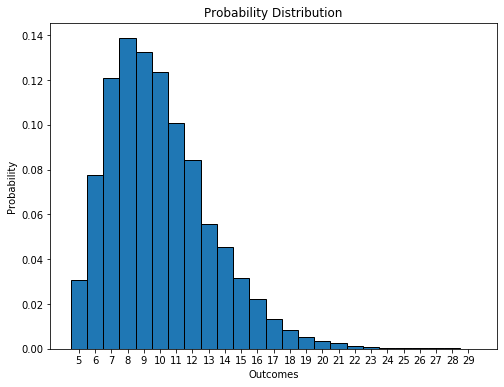

In [7]:
# Complete the template to create a pascal random variable    
    
def pascal(m,p=0.5,size=1):
    def pascalAux(m,p):
        pas_count = 0
        pas_sum = 0
        while(pas_count < m):
            pas_sum += geometric(p)
            pas_count += 1
        return pas_sum
            
    lst = [pascalAux(m,p) for k in range(size)]
    if size == 1:
        return lst[0]
    else:
        return lst    

np.random.seed(0)

# Test 1: should return 10 or 10.0  (not [10])

print(pascal(5,0.6),'\n')

# Test 2: should return 28 or 28.0  (not [28])

print(pascal(5,0.2,1),'\n')

# Test 3: should return a list or array    [14, 8, 7, 6, 8, 9, 7, 10, 13, 18]

print(pascal(5,0.5,10),'\n')

draw_distribution_from_outcomes(pascal(5,0.5,10**4))

## Problem Ten: Generating a Distribution by Inverting the CDF

In this problem we will investigate how to implement a random variable given by an arbitary probability distribution function. First, however, you need to know about the CDF, the Cumulative Distribution Function, which is a simple but crucially important idea, which you can understand by looking at the last slide on Lecture 8 (which I did not cover in lecture) or <a href="https://www.probabilitycourse.com/chapter3/3_2_1_cdf.php">here</a>. Please look at this before continuing with the lab. 

The basic idea in these problems is that we can essentially "invert" the CDF to obtain a function from a random variate in the range $[0..1)$ into  a random variable from the given distribution. 


### (A): Calculating the Cumulative Distribution Function

Complete the following to calculate $F_X$ for the CDF of the probability distribution $P_X$, and then 
demonstrate your code by calculating and displaying the CDF for $X\sim binomial(5,0.5)$. 


Fx = [0.0312 0.1875 0.5    0.8125 0.9688 1.    ]


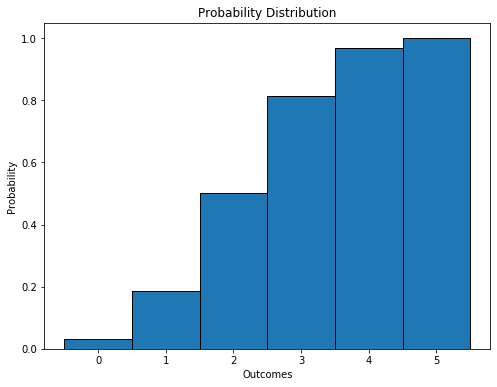

In [8]:
# Create a running sum of the probabilities
# in the PMF to define the CDF

def CDF(Px):
    C = [0] * len(Px)                      # Your code here
    C[0] = Px[0]
    cdf_sum = 0
    for i in range(1,len(Px)):
        C[i] = C[i-1] + Px[i]
    # Your code here
    
    C[-1] = 1.0                 # Just in case: FP error may not add all to exactly 1.0
    return C

# This is binomial(5,0.5)
Rx10A = [0,1,2,3,4,5]
Px10A = [1/32,5/32,10/32,10/32,5/32,1/32]

# create the CDF
Fx10A = CDF(Px10A)

print("Fx =", np.around(Fx10A,4))

draw_distribution_of_random_variable(Rx10A,Fx10A)

# Should get Fx = [0.0312 0.1875 0.5    0.8125 0.9688 1.    ]
# and the display of the distribution

### (B): Generating random variates by inverting the CDF

The basic idea here is that the CDF is a function from outcomes to probabilities:

$$F_X\,:\,R_X\rightarrow [0..1)$$

if we invert this function, we get
a function from the interval $[0..1)$ into the outcomes:

$$F^{-1}_X\, : \,[0..1)\rightarrow R_X$$ 

The algorithm for doing this is actually very simple: 

>  Generate a random value $a$ in the range $[0..1)$ and search from left to right for the first bin which is greater than $a$; output the corresponding outcome.

The next two cells contains a demonstration of this idea: the first one shows the binomial distribution Binomial(3,0.5), the second shows how the random value $a$ selects one of the outputs. Run that cell a few times to see where the random value ends up: the first bin that the red line intersects going left to right indicates the outcome that is output. Be sure you understand how this process works, and what number would be output, for each test. 

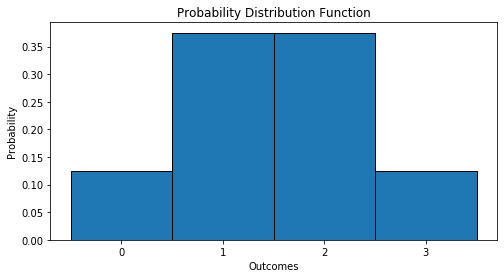

In [9]:
Rx9B = [0,1,2,3]
Px9B = [1/8,3/8,3/8,1/8]

Fx9B = CDF(Px9B)

plt.figure(figsize=(8, 4))
plt.bar(Rx9B,Px9B,width=1.0,edgecolor='black')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
if (Rx9B[-1] - Rx9B[0] < 30):
    ticks = range(Rx9B[0],Rx9B[-1]+1)
    plt.xticks(ticks, ticks)  
plt.title("Probability Distribution Function")
plt.show()

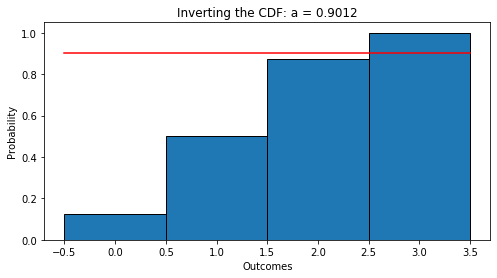

In [10]:
# Run this a few times and make sure you understand what
# outcome would be produced in each case

plt.figure(figsize=(8, 4))
plt.bar(Rx9B,Fx9B,width=1.0,edgecolor='black')
a = random()
plt.plot([-0.5,3.5],[a,a],color="red")
plt.ylabel("Probability")
plt.xlabel("Outcomes") 
plt.title("Inverting the CDF: a = " + str(np.around(a,4)))
plt.show()

### TODO for 10 (B):

Complete the following code template to generate random variates for
a given random variable (represented by Rx and Px), using the code from Part (A). 

Demonstrate your code by generating $10^5$ variates from the random variable $X$ from Problem Two and display it using <code>draw_distribution_from_outcomes(...)</code>. 

Hint: Compare with the theoretical distribution from Problem Two.  They should be very close! 

Demonstration:


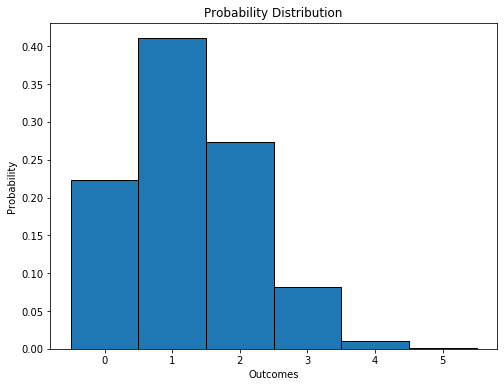

In [11]:
def rvs(Rx,Px):
    Fx10b = CDF(Px)               # Your code here
    a10b = np.random.random()
    for i in range(len(Fx10b)):
        if (a10b<Fx10b[i]):
            return Rx[i]

Rx9BB = Rx2            # Your code here
Px9BB = Px2 

print("Demonstration:")

np.random.seed(0)

Outcomes9B = [ rvs(Rx9BB,Px9BB) for i in range(10**5) ]

draw_distribution_from_outcomes(Outcomes9B)

## Problem Eleven:  Creating Random Variates for Standard Distributions by Inverting the CDF

Now we will apply the technique from the last problem to generate random variates for two common distributions.
 

### Part (a) Binomial Variates

Create the binomial random variable using the technique shown above of inverting the CDF (you did this a different way in the previous lab). 
 
Display the result of generating $10^5$ random variates from the Binomial
Distribution with $N=8$ and $p=0.8$ using <code>draw_distribution_from_outcomes</code>.  




Solution:



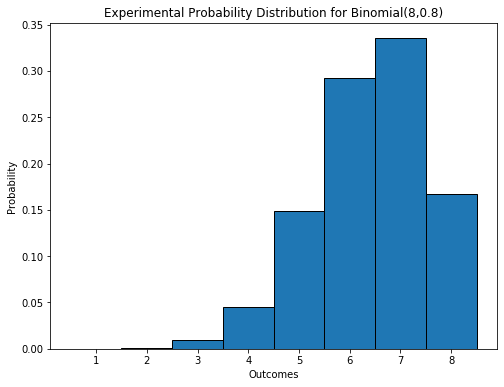

In [12]:
# Now generate the empirical distribution

N = 8
p = 0.8

# Your code here

Rx11a = [0,1,2,3,4,5,6,7,8]            # Your code here
Px11a = [C(N,k)*p**k*(1-p)**(N-k) for k in Rx11a]

print("Solution:\n")

num_trials = 10**5

np.random.seed(0)         

Outcomes11a  = [ rvs(Rx11a ,Px11a ) for k in range(num_trials)]

draw_distribution_from_outcomes( Outcomes11a , "Experimental Probability Distribution for Binomial("+str(N)+","+str(p)+ ")")

### Part (b) Geometric Variates 

Although $R_x$ is infinite, we will only approximate this distribution by considering the first 20 outcomes. 
This will potentially create an error, since of course it is possible for the value produce to be larger than 20, however, the probability is so small we will not worry about it. Note that our code for the CDF did not
calculate the last bin, but simply set it to 1.0, which will make sure our generation of random variates does not crash. 

Display the experimental distribution for the Geometric Distribution with $p=0.6$, using <code>draw_distribution_from_outcomes</code>  for $10^5$ trials.  



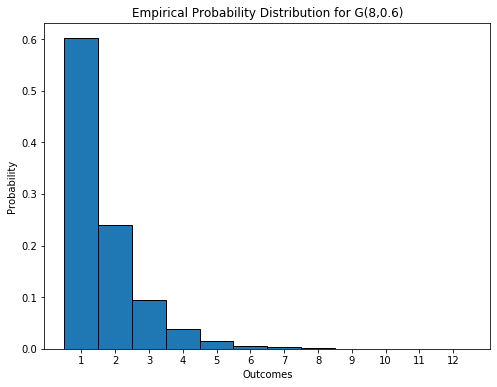

In [13]:
# Solution

limit = 20
p = 0.6 


# Your code here


Rx11B = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]            # Your code here
Px11B = [(1-p)**(k-1)*p for k in Rx11B] 

# Test it!

np.random.seed(0)

R =  [ rvs(Rx11B,Px11B) for k in range(30) ]

num_trials = 10**5

np.random.seed(0)             # this is from the random library, to make sure student answers are consistent with my solution

Outcomes11B = [ rvs(Rx11B,Px11B) for k in range(num_trials)]

draw_distribution_from_outcomes( Outcomes11B , "Empirical Probability Distribution for G("+str(N)+","+str(p)+ ")")

##  Problem Twelve: Generating the Geometric Distribution by Explicit Formula

Now we will explore using an explicit function for the inverse of the CDF. This is not possible for all distributions, but when it is, it the simplest (and most efficient) method.  

The following formula is from <a href="https://en.wikipedia.org/wiki/Geometric_distribution">Wikipedia</a>: if U is a random variable uniformly distributed in the range [0..1), then

$$    1 + \lfloor \,\ln{( U )} \, \,/ \, \ln{( 1 - p )}  \,\rfloor$$            
          
is an integer which is distributed according to the Geometric Distribution with probability p.

Note: $\ln$ is log to the base $e$ (just `log(...)` in Python). 


For this problem, simply complete the following function stub and demonstrate it and you did in the previous problems.  


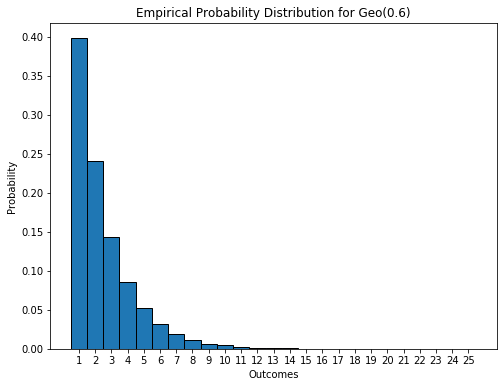

In [14]:
def geom_rvs(p):
    return 1 + int(log(np.random.random())/log(1-p))      # Your code here

# test it
          
p12 = 0.4 
          
num_trials = 10**5

np.random.seed(0)

Outcomes12 = [ geom_rvs(p12) for k in range(num_trials)]

draw_distribution_from_outcomes( Outcomes12 , "Empirical Probability Distribution for Geo(" + str(p) + ")")